# Figures for n=2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from funciones import *
from matplotlib.lines import Line2D

### Here we observe $\lambda$ evolution for n=2 (exponential) and for n=1 (linear)

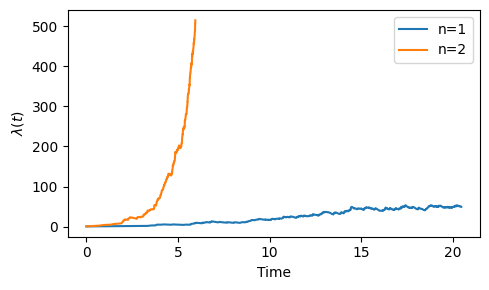

In [24]:
K = 5*10**2
mu = 1.0
plt.figure(figsize=(5,3))
for n in np.arange(1,3):
    times, rate = generate_series(K, n, mu)
    plt.plot(times, rate, label=f'n={n}')
plt.legend()
plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('$\lambda (t)$')
plt.tight_layout()

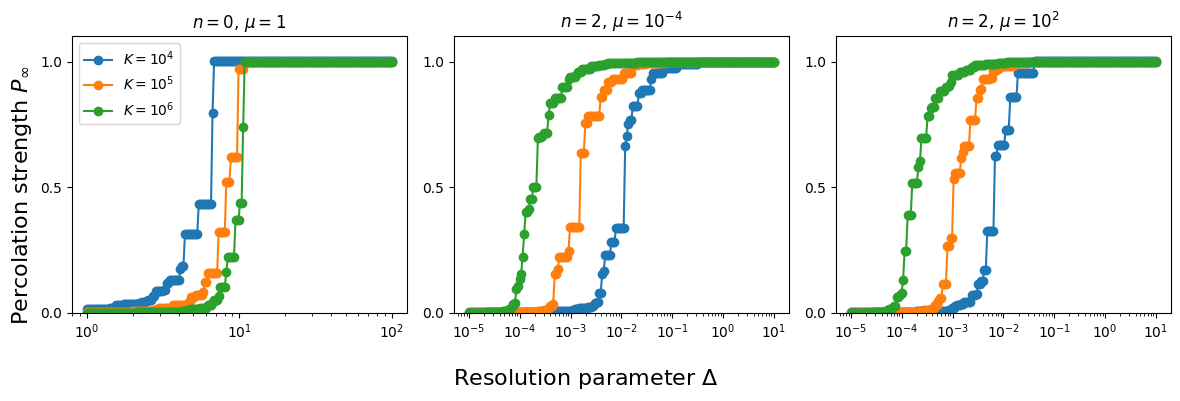

In [6]:
fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)
K = 10**6
mus = [1, 10**-4, 10**2]
ns = [0, 2, 2]
labels = ['$K=10^4$','$K=10^5$','$K=10^6$','$K=10^7$','$K=10^8$']
deltas = [np.logspace(0, 2, num = 200, base = 10), np.logspace(-5, 1, num = 200, base = 10), np.logspace(-5, 1, num = 200, base = 10)]
for i in range(3):
    n = ns[i]
    mu = mus[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(3):
        K = 10**(_+3)
        times_between_events, _, _ = generate_series_perc(K, n, mu)
        delta = deltas[i]
        percolation_strength = calculate_percolation_strength(times_between_events, delta)
        ax.plot(delta, percolation_strength, marker='o')
    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.axes[0].set_title('$n=0$, $\mu=1$')
fig.axes[1].set_title('$n=2$, $\mu=10^{-4}$')
fig.axes[2].set_title('$n=2$, $\mu=10^{2}$')
fig.axes[0].legend(labels, loc='upper left', ncol=1)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()

# Figures for $R=10^3$

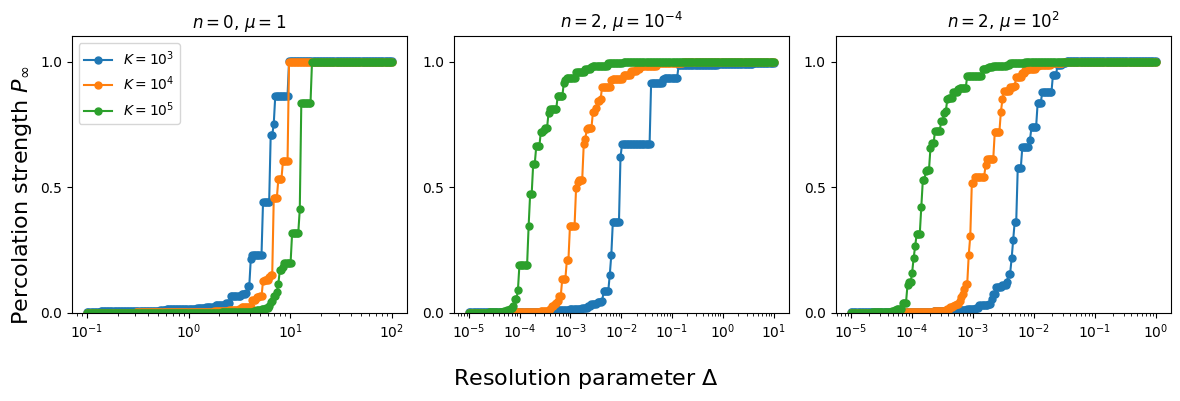

In [28]:
fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

R = 10**3

mus = [1, 10**-4, 10**2]
ns = [0, 2, 2]

labels = ['$K=10^3$','$K=10^4$','$K=10^5$','$K=10^6$','$K=10^7$','$K=10^8$']
deltas = [np.logspace(-1, 2, num = 200, base = 10), np.logspace(-5, 1, num = 200, base = 10), np.logspace(-5, 0, num = 200, base = 10)]

for i in range(3):
    n = ns[i]
    mu = mus[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(3):
        K = 10**(_+3) # Cambiar a 3 cuando quiera la figura
        delta = deltas[i]
        percolations = np.zeros([R, len(delta)])
        
        for j in range(R):
            times_between_events, _, _ = generate_series_perc(K, n, mu)
            percolations[j,:] = calculate_percolation_strength(times_between_events, delta)
        
        percolation_means = np.mean(percolations, axis=0)
        ax.plot(delta, percolation_means, marker='o', markersize=5)
    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.axes[0].set_title('$n=0$, $\mu=1$')
fig.axes[1].set_title('$n=2$, $\mu=10^{-4}$')
fig.axes[2].set_title('$n=2$, $\mu=10^{2}$')
fig.axes[0].legend(labels, loc='upper left', ncol=1, fontsize=10)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()

# Using .npy files plot the stats in the next cell